In [3]:
import pandas as pd
from google.colab import files

In [4]:
df = pd.read_csv('/content/OnlineRetail.csv')
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


**Question 1: What time were sales highest in? How much were the total sales during that time?**



In [5]:
df['Time'] = df['InvoiceTime'].str[:2]
df['Time'] = df['Time'].astype(int)
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,Time
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,8
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,8
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,8
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,8
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,8


In [6]:
hourly_sales = df.groupby('Time')['Totalsale'].sum().reset_index()
hour_with_most_sales = hourly_sales.loc[hourly_sales['Totalsale'].idxmax()]
most_sales_hour = int(hour_with_most_sales['Time'])
total_sales_for_hour = hour_with_most_sales['Totalsale']
print(f"The hour with the most sales is {most_sales_hour} PM with total sales of ${total_sales_for_hour:.2f}")


The hour with the most sales is 12 PM with total sales of $1362484.29


**Question 2: What Country sold the most product?**

The country that sold the most products is the United Kingdom with 4263829 products sold.


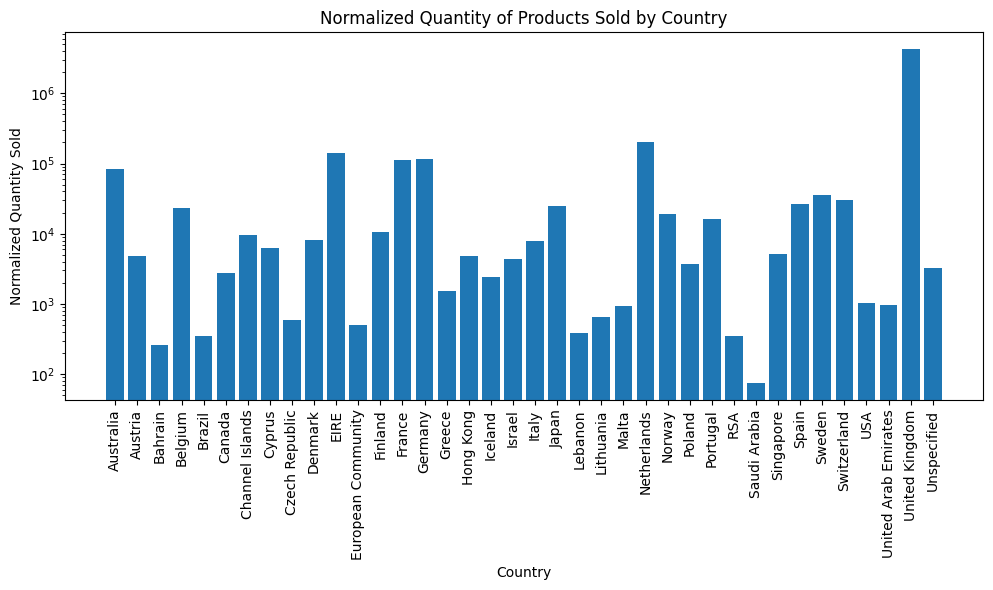

In [7]:
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()
country_with_most_sales = country_sales.loc[country_sales['Quantity'].idxmax()]
print(f"The country that sold the most products is the {country_with_most_sales['Country']} with {country_with_most_sales['Quantity']} products sold.")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(country_sales['Country'], country_sales['Quantity'])
plt.xlabel('Country')
plt.ylabel('Normalized Quantity Sold')
plt.title('Normalized Quantity of Products Sold by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.yscale('log')
plt.show()
#Normalization implemented for clarification purposes

**Question 3: Which product sold the most?**

In [8]:
product_type = df.groupby('Description')
quantity_ordered = product_type.sum()['Quantity']
most_sold_product = quantity_ordered.idxmax()
quantity_sold_of_highest_product = quantity_ordered.max()
print(f"The product that sold the most is: {most_sold_product} with {quantity_sold_of_highest_product} products sold.")

The product that sold the most is: WORLD WAR 2 GLIDERS ASSTD DESIGNS with 53847 products sold.


<ipython-input-8-09e6e2bff2c1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_type.sum()['Quantity']


Question 4: What products are associated with repeat customers?

In [13]:
repeat_customer_threshold = 1
repeat_customers = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() > repeat_customer_threshold].index.tolist()
repeat_customer_data = df[df['CustomerID'].isin(repeat_customers)]
product_count = repeat_customer_data['Description'].value_counts()
most_common_products = product_count.head(10)
print('Top Products Associated with Repeat Customers:')
for product, count in product_count.head(10).items():  # Adjust the number as needed
    print(f'{product} was purchased {count} times by repeat customers.')

Top Products Associated with Repeat Customers:
WHITE HANGING HEART T-LIGHT HOLDER was purchased 2070 times by repeat customers.
REGENCY CAKESTAND 3 TIER was purchased 1903 times by repeat customers.
JUMBO BAG RED RETROSPOT was purchased 1659 times by repeat customers.
ASSORTED COLOUR BIRD ORNAMENT was purchased 1418 times by repeat customers.
PARTY BUNTING was purchased 1414 times by repeat customers.
LUNCH BAG RED RETROSPOT was purchased 1358 times by repeat customers.
SET OF 3 CAKE TINS PANTRY DESIGN  was purchased 1232 times by repeat customers.
POSTAGE was purchased 1196 times by repeat customers.
LUNCH BAG  BLACK SKULL. was purchased 1126 times by repeat customers.
PACK OF 72 RETROSPOT CAKE CASES was purchased 1080 times by repeat customers.
